<a href="https://colab.research.google.com/github/Springboard-CourseDev/MachineLearningForEngineers/blob/master/Build_Project_1_CTR_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build Project 1: Click-Through Rate Prediction 

The click-through rate (CTR) is a fundamental metric in digital advertising that measures the efficacy of ads. Estimating CTR is important to a business as it typically dictates how much the business is willing to spend to display a given ad. CTR depends on user factors in addition to aspects of the ad like when it was shown to the user, and its dimensions. CTR is typically noisy but with careful feature engineering a signal can be found.

In this project you'll be using a subset of [Kaggle's Avazu CTR dataset](https://www.kaggle.com/competitions/avazu-ctr-prediction/) to do exploratory data analysis and feature engineering. 

Here is a summary of the dataset's schema:

  * **id**: ad identifier more specifically the add ID
  * **click**: 0/1 for non-click/click (this is the target variable. indicates if this ad was clicked or not)
  * **hour**: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
  * **C1**: anonymized categorical variable
  * **banner_pos**: position when the ad might be displayed
  * **site_id**: ID of the website
  * **site_domain**: domain where the site is hosted
  * **site_category**: category to which the site belongs
  * **app_id**: application ID
  * **app_domain**: application domain
  * **app_category**: application category
  * **device_id**: ID of the device from which the ad is clicked
  * **device_ip**: Network IP to which the device was connected to while clicking on the ad (eg: 192.145.86.35)
  * **device_model**: model of the device used for clicking the ad.
  * **device_type**: type of device used for clicking the ad (eg: laptop, desktop, mobile)
  * **device_conn_type**: connection type of the device (LAN, wifi, etc)
  * **C14-C21**: anonymized categorical variables

Import a few libraries you'll be using. 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

Load the Avazu CTR dataset into pandas.



In [2]:
avazu_df = pd.read_csv('/content/avazu_ctr.zip')

How many rows and columns are in the raw dataset?

In [3]:
avazu_df.shape

(404773, 24)

View the first 5 rows in the dataframe. Sometimes, for dataframes with a lot of features, it's useful to transpose the output of the `head` function. 

In [4]:
avazu_df.head().transpose()

,0,1,2,3,4
id,10004482643316086592,10006777279679619273,10023110164290040687,10060395879435434399,10068417048966587383
click,0,0,0,1,0
hour,14102100,14102100,14102100,14102100,14102100
C1,1005,1005,1005,1005,1005
banner_pos,0,0,0,0,0
site_id,85f751fd,85f751fd,1fbe01fe,d9750ee7,1fbe01fe
site_domain,c4e18dd6,c4e18dd6,f3845767,98572c79,f3845767
site_category,50e219e0,50e219e0,28905ebd,f028772b,28905ebd
app_id,66a5f0f3,d2bb6502,ecad2386,ecad2386,ecad2386
app_domain,d9b5648e,2347f47a,7801e8d9,7801e8d9,7801e8d9


First, check if there are any null values that must be accounted for in the dataset. 

In [5]:
avazu_df.isnull().any()

id                  False
click               False
hour                False
C1                  False
banner_pos          False
site_id             False
site_domain         False
site_category       False
app_id              False
app_domain          False
app_category        False
device_id           False
device_ip           False
device_model        False
device_type         False
device_conn_type    False
C14                 False
C15                 False
C16                 False
C17                 False
C18                 False
C19                 False
C20                 False
C21                 False
dtype: bool

**Exercise**: Use scikit-learn's `train_test_split` to split the Avazu dataset into training and test sets. Use 70% of the data to form the train set. 

**Exercise**: In your training set, calculate the overall CTR. 

In [9]:
X_train, X_test = train_test_split(avazu_df, train_size=0.7, random_state=42)

In [10]:
X_train['click'].value_counts(normalize=True)

0    0.83162
1    0.16838
Name: click, dtype: float64

## Exploratory Data Analysis

In this section you'll explore the training split of the Avazu dataset. Use [Sweetviz](https://pypi.org/project/sweetviz/) to start and create custom visualizations as needed. 

First, install Sweetviz using pip. 

In [ ]:
!pip install sweetviz

**Exercise**: Run an analysis report on your training data using Sweetviz's `analyze` function. 

In [13]:
import sweetviz as sv

In [14]:
analyze_report = sv.analyze(X_train, target_feat='click')

                                             |          | [  0%]   00:00 -> (? left)


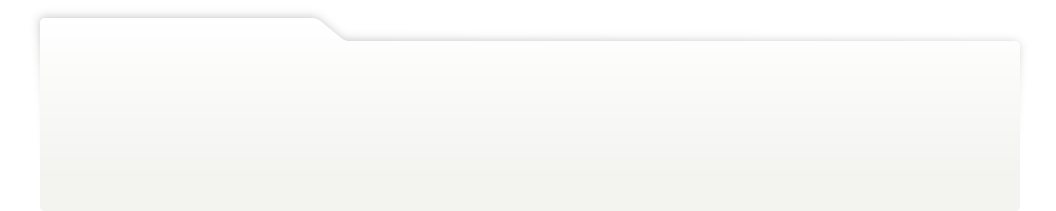
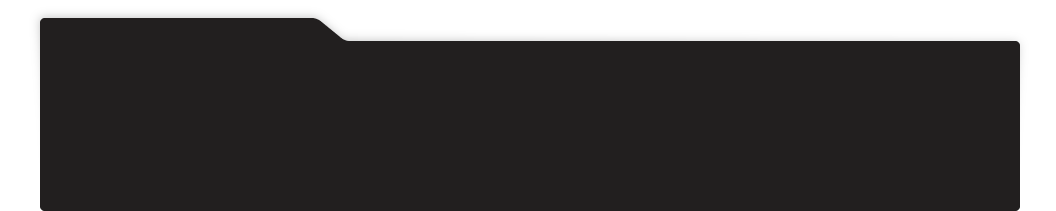
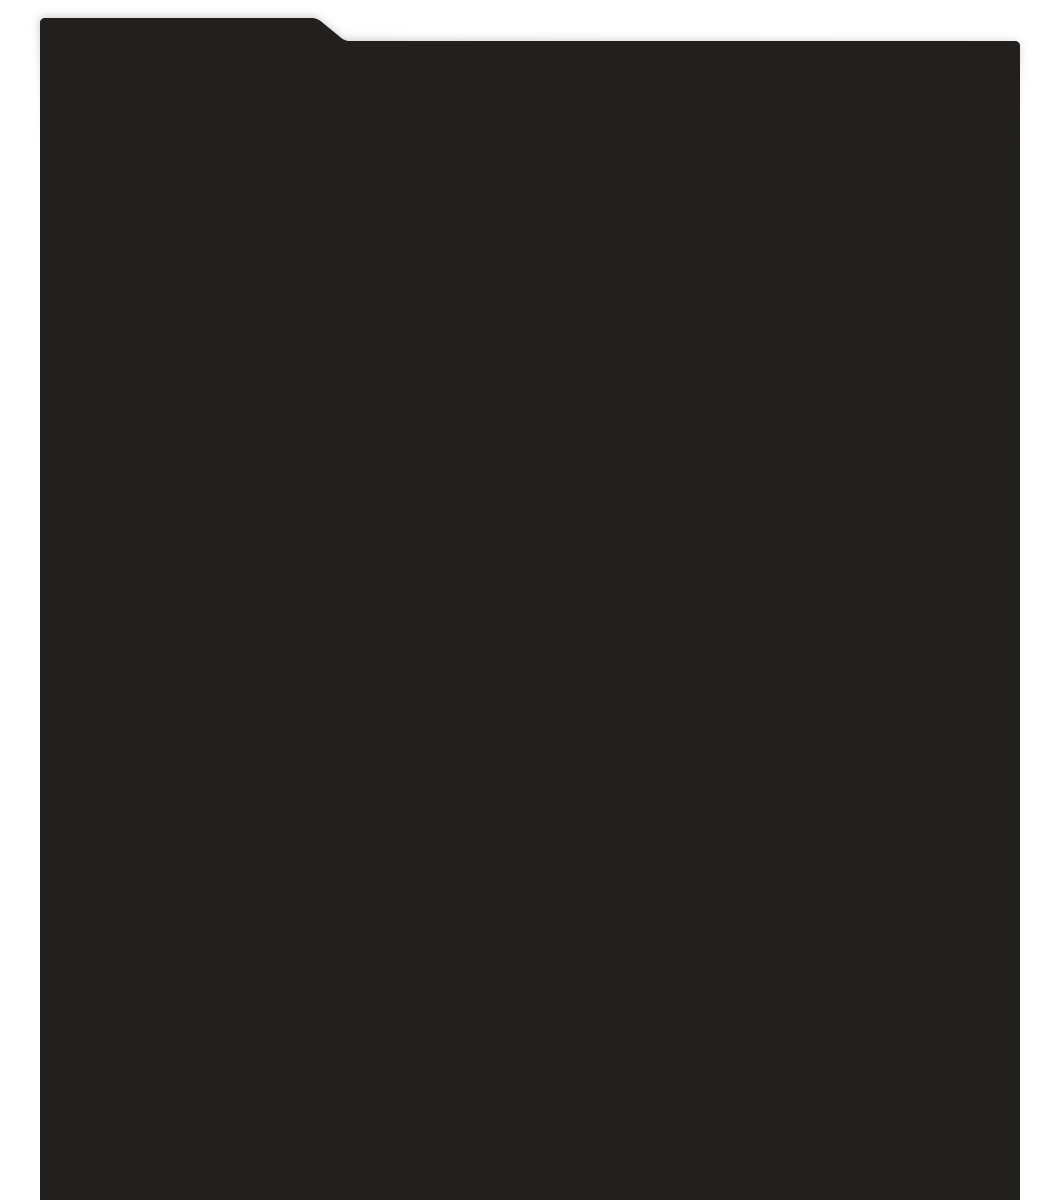
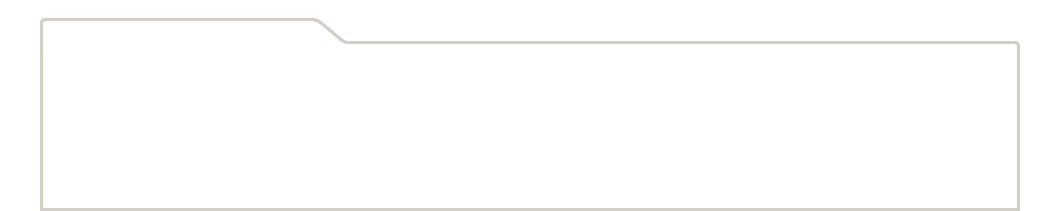
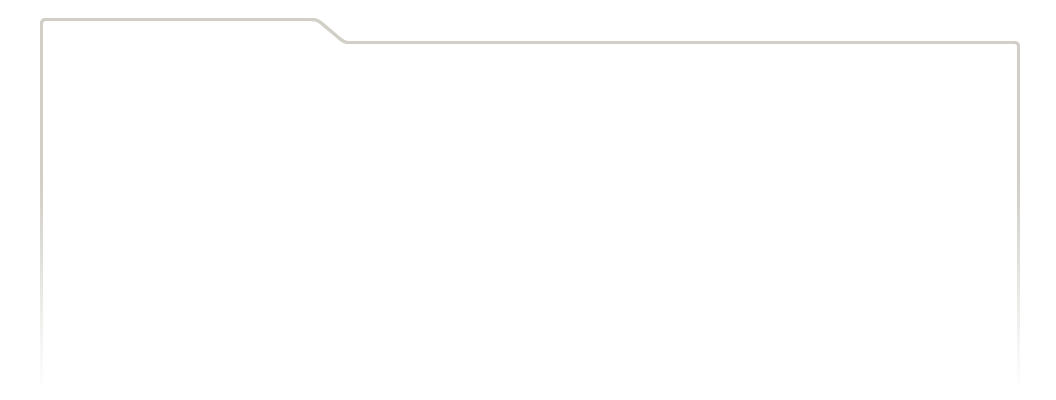
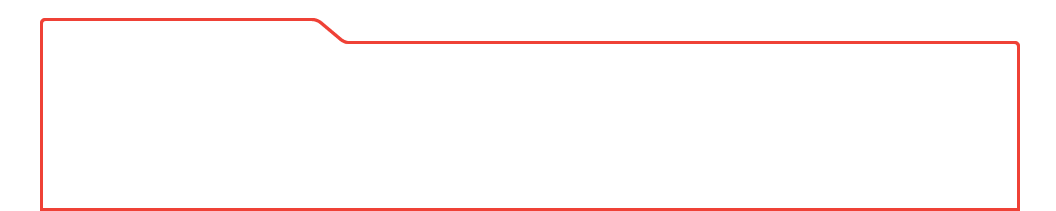
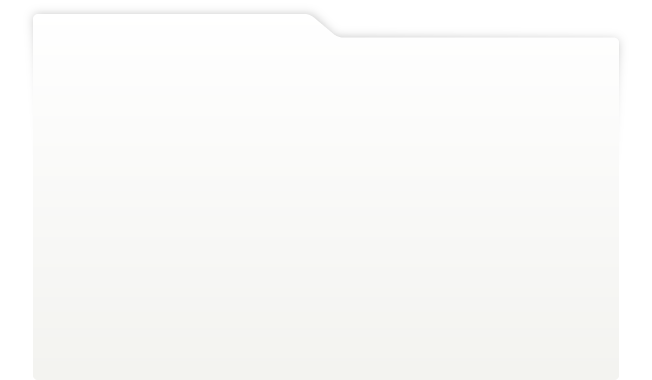
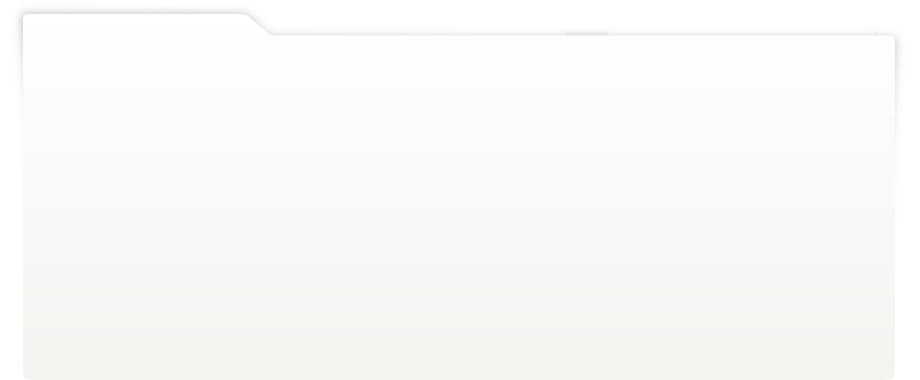
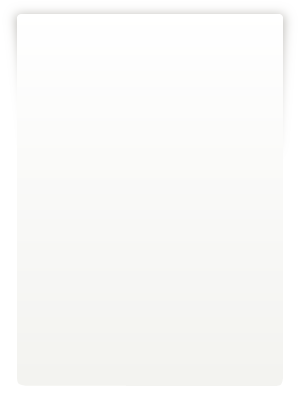
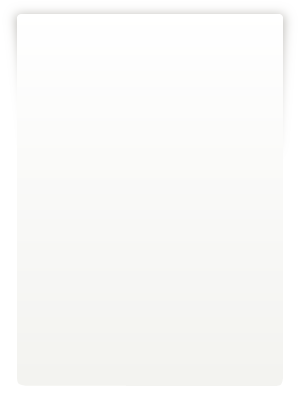
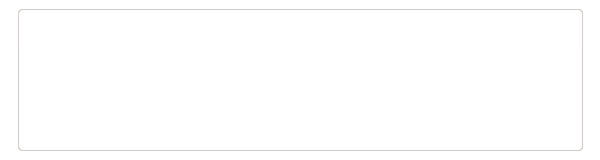
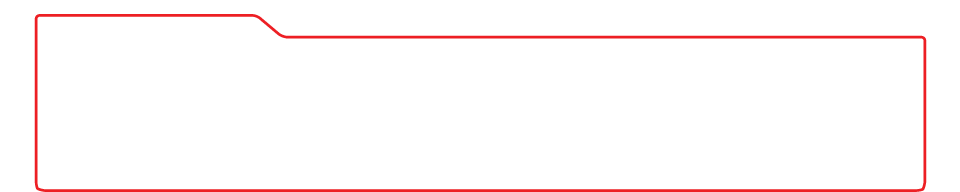
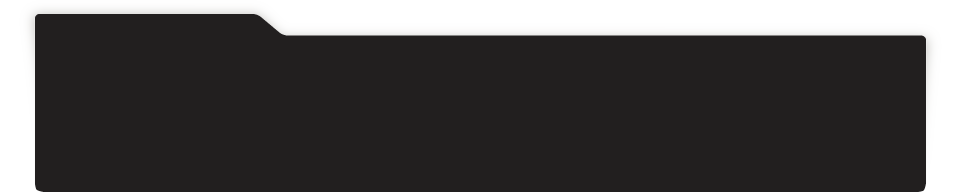
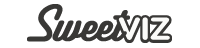
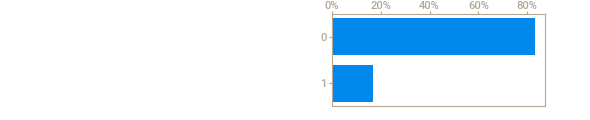
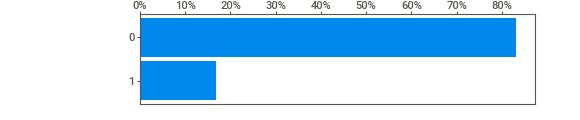
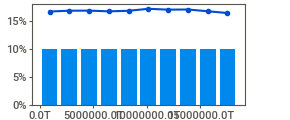
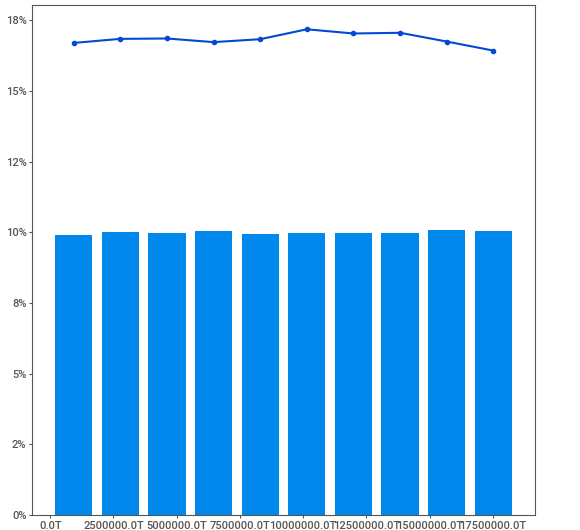
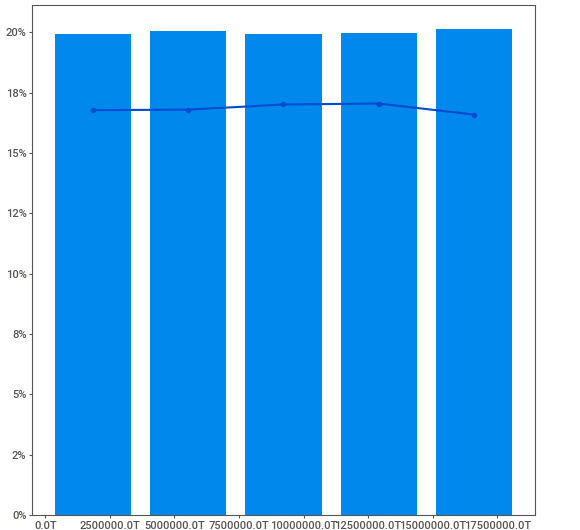
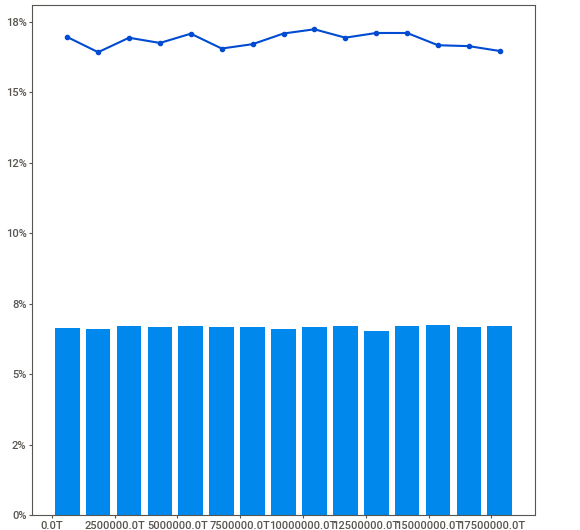
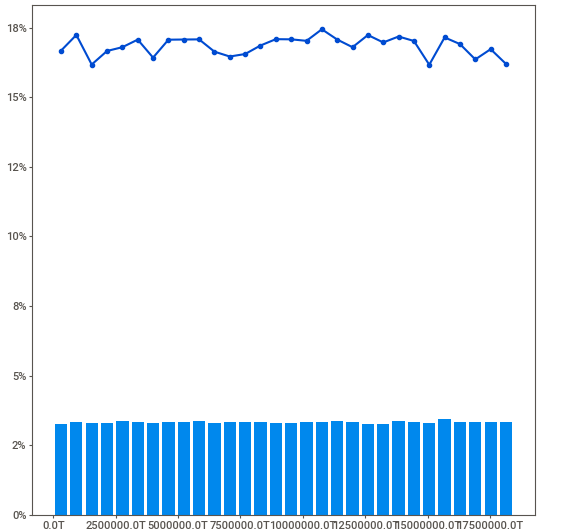
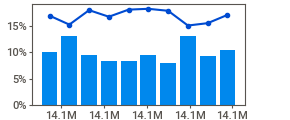
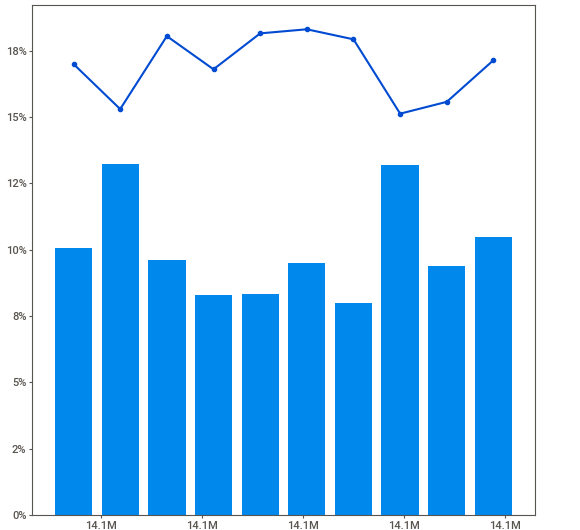
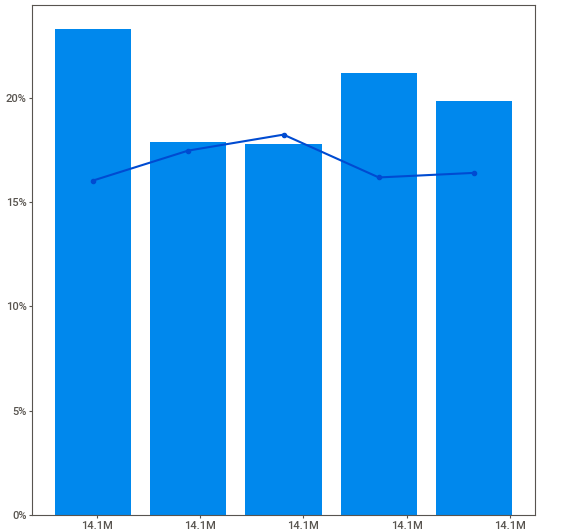
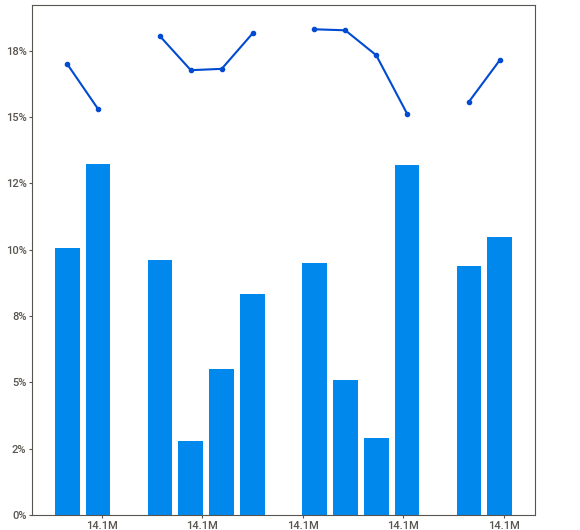
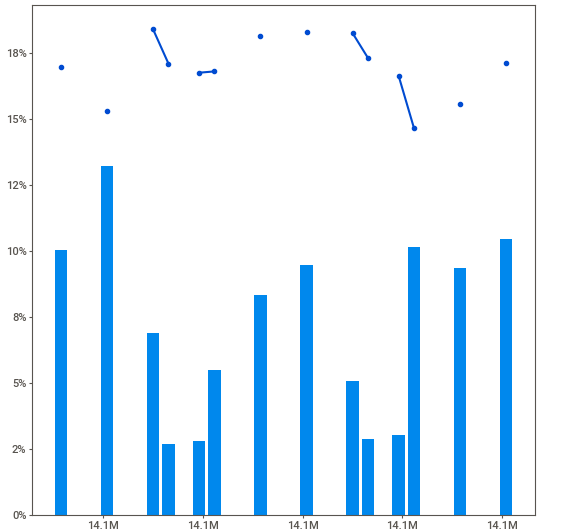
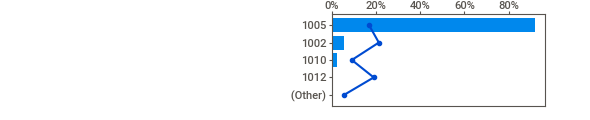
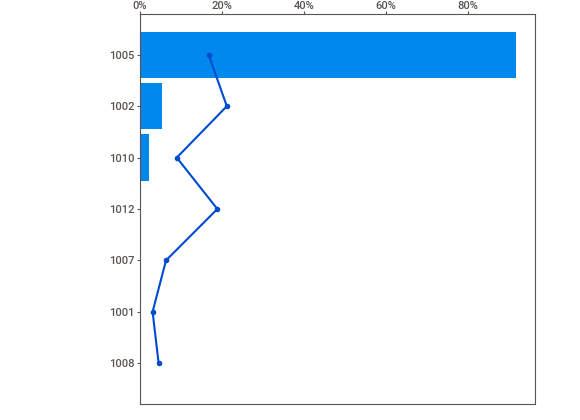
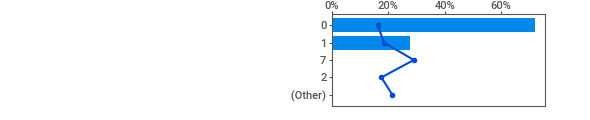
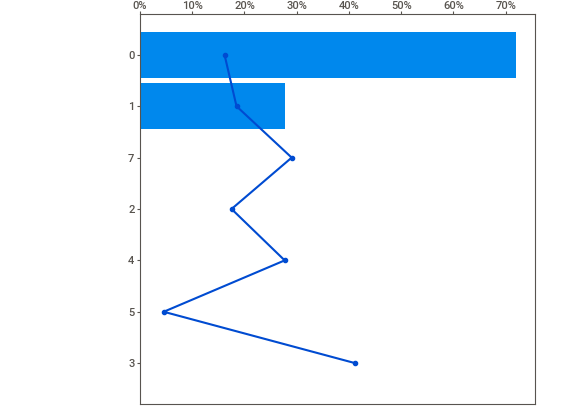
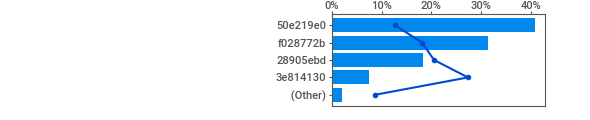
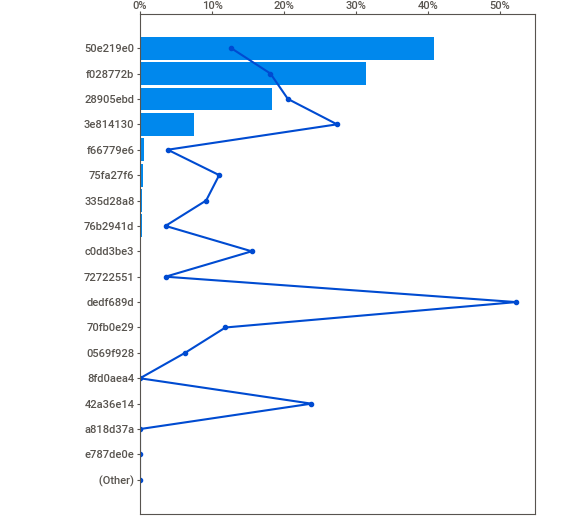
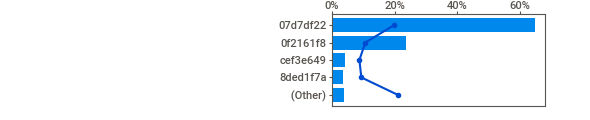
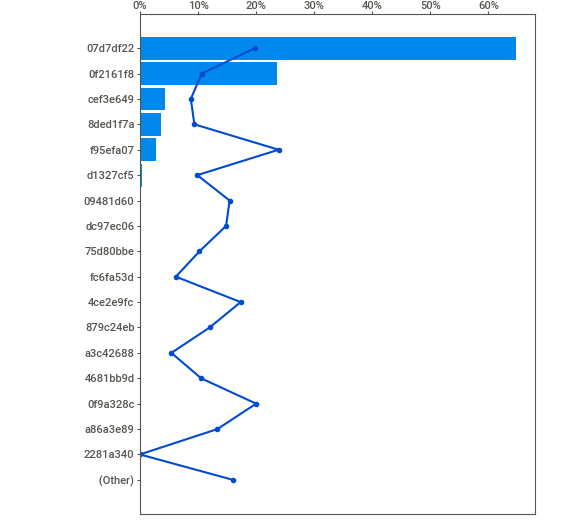
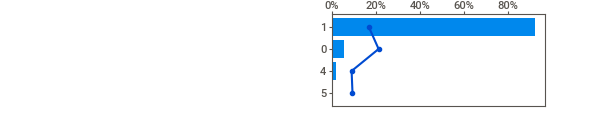
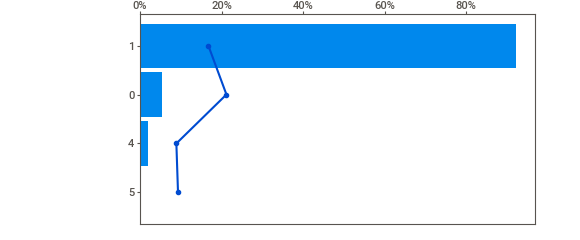
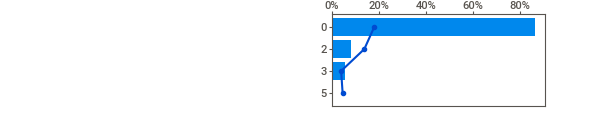
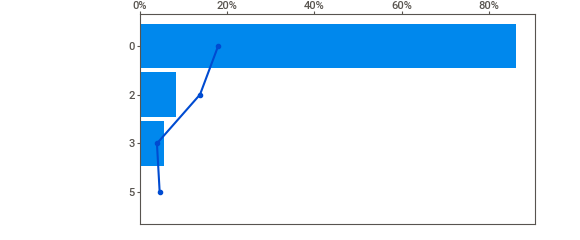
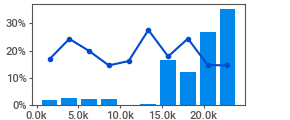
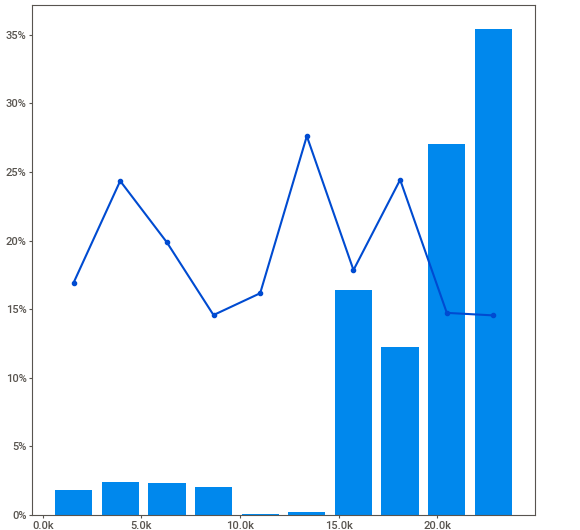
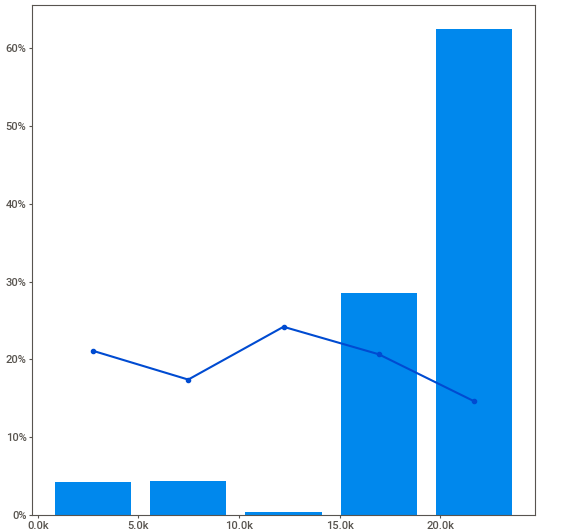
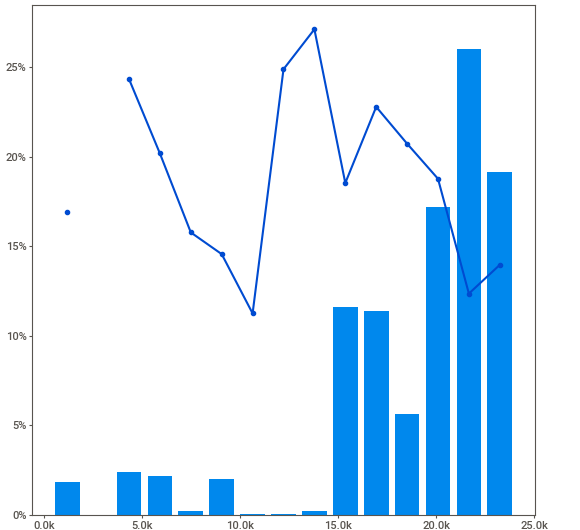
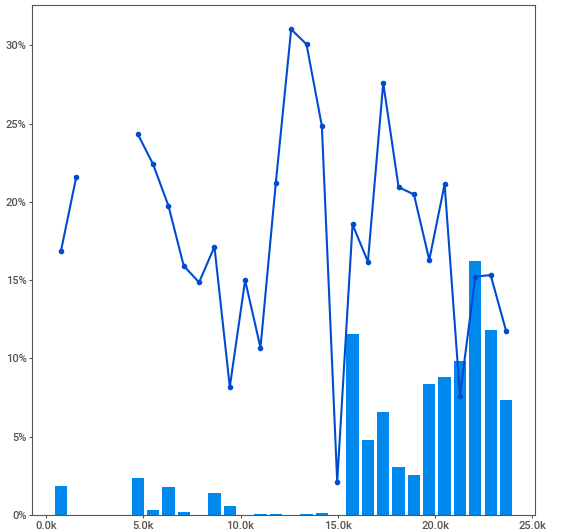
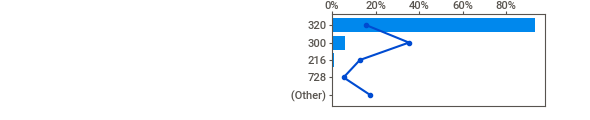
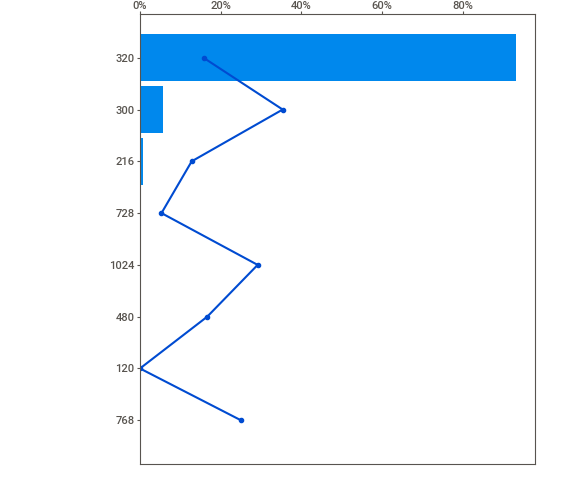
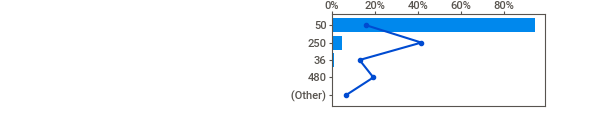
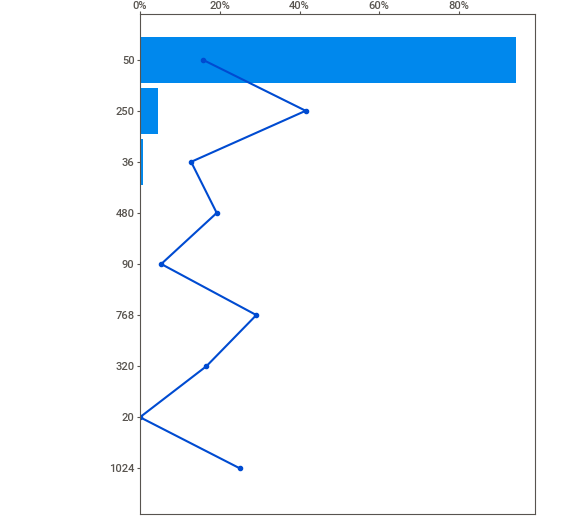
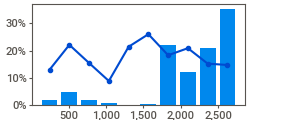
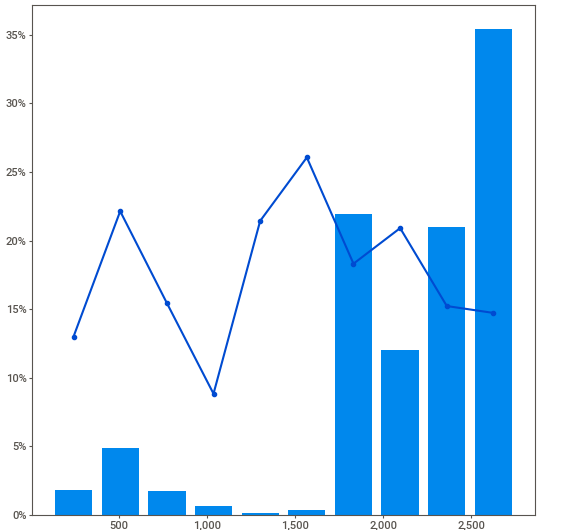
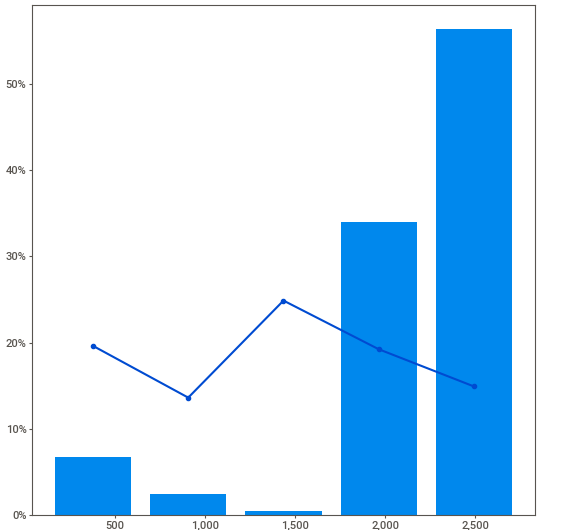
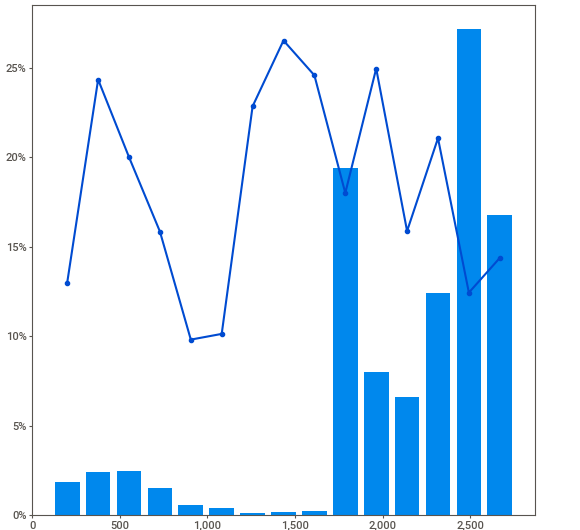
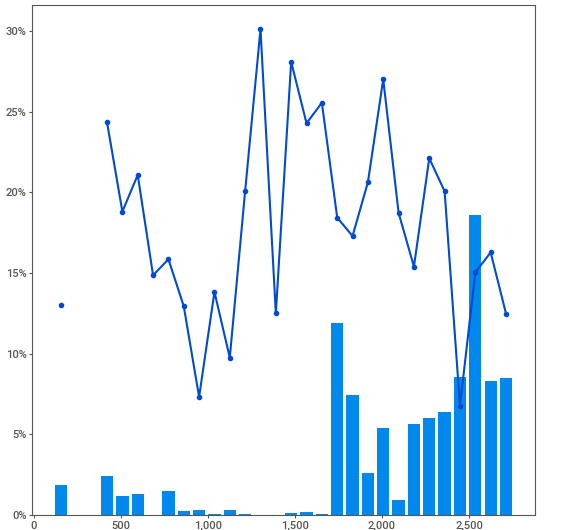
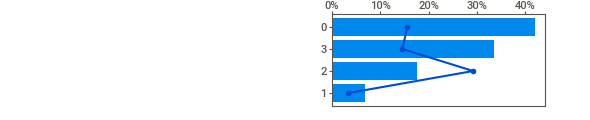
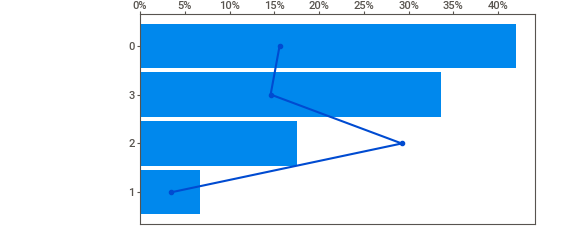
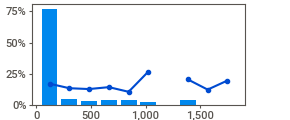
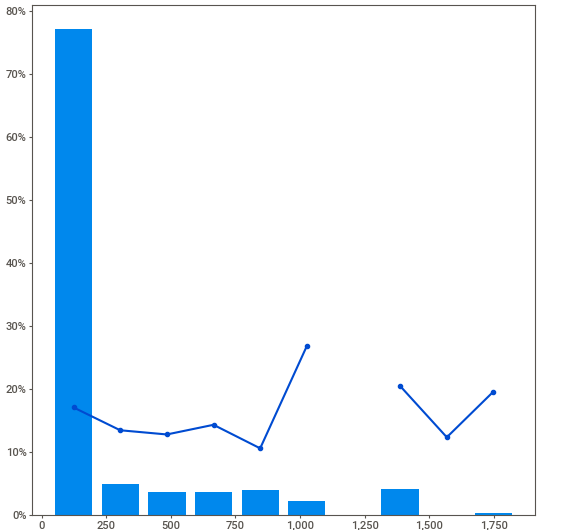
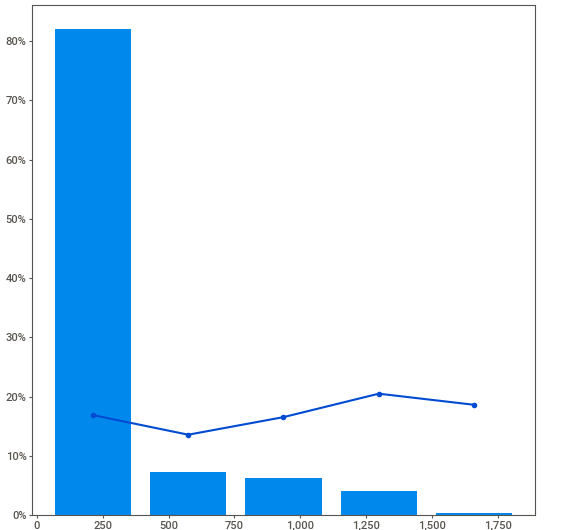
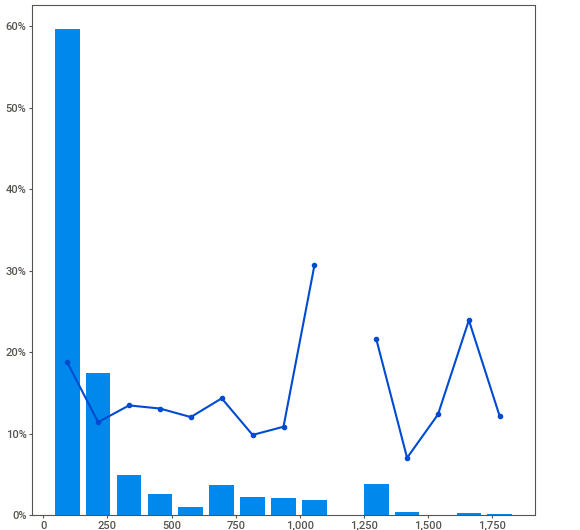
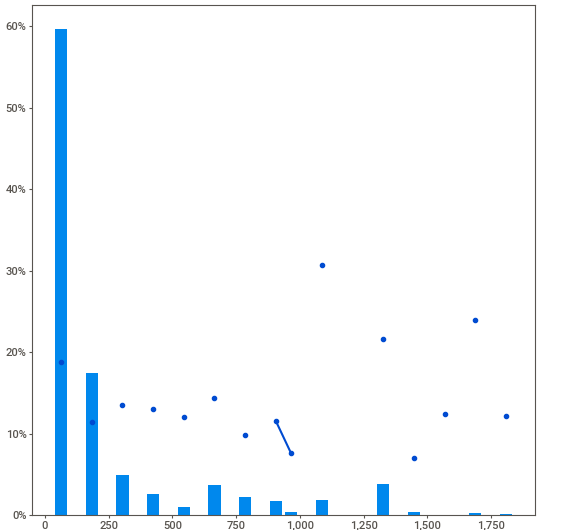
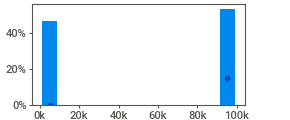
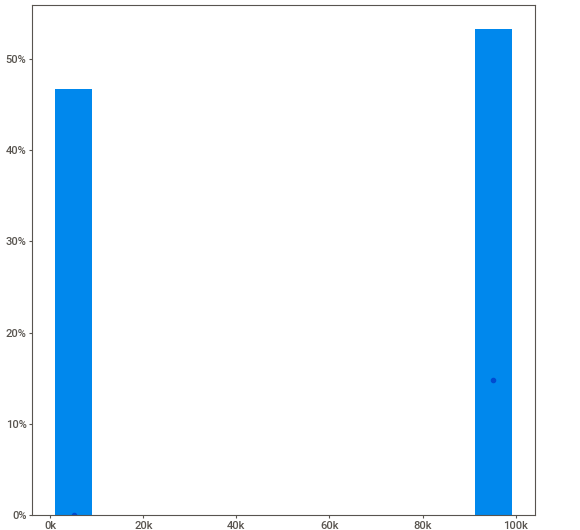
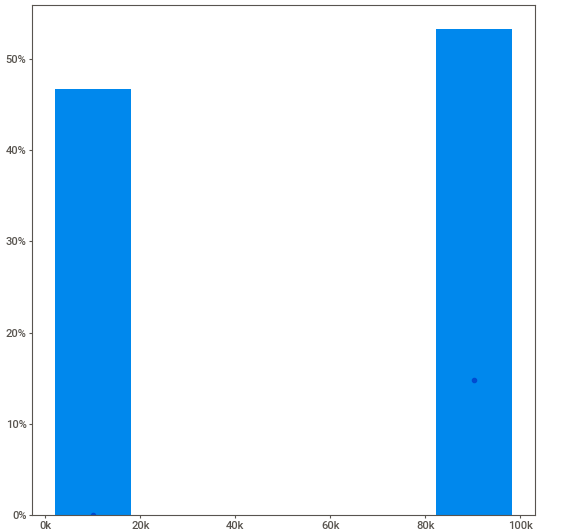
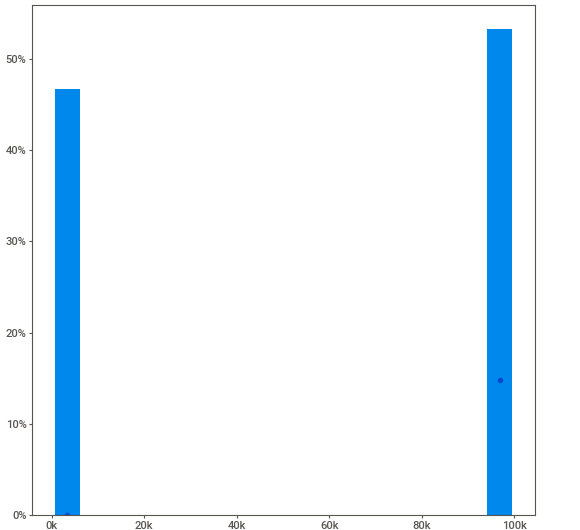
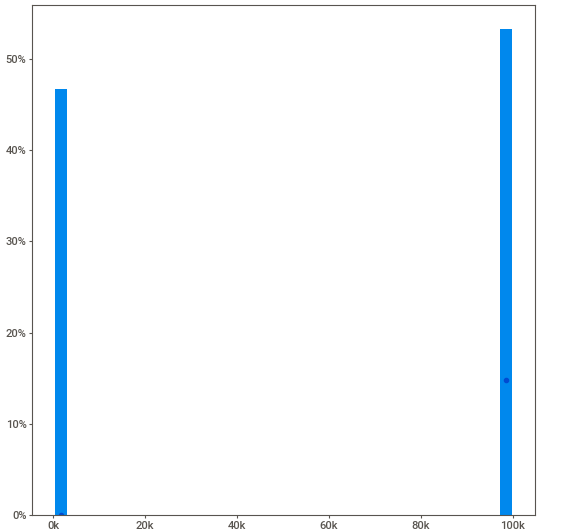
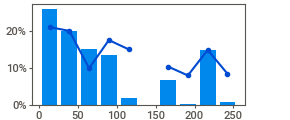
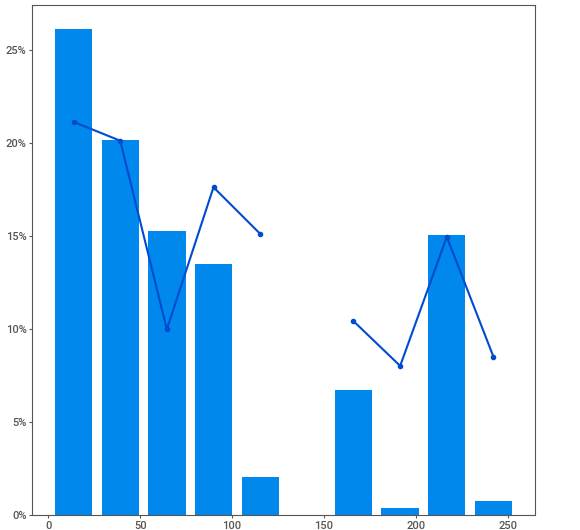
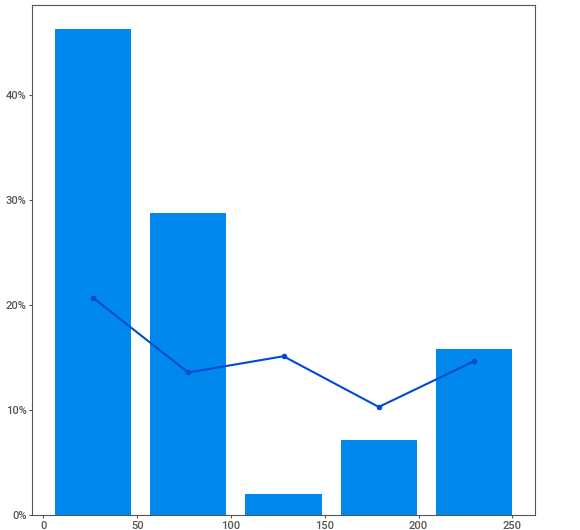
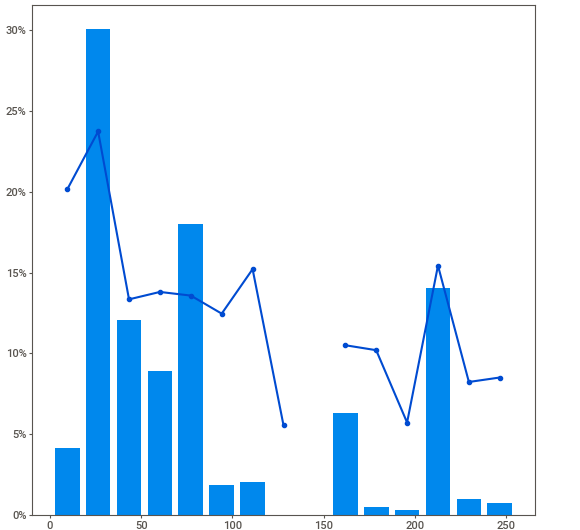
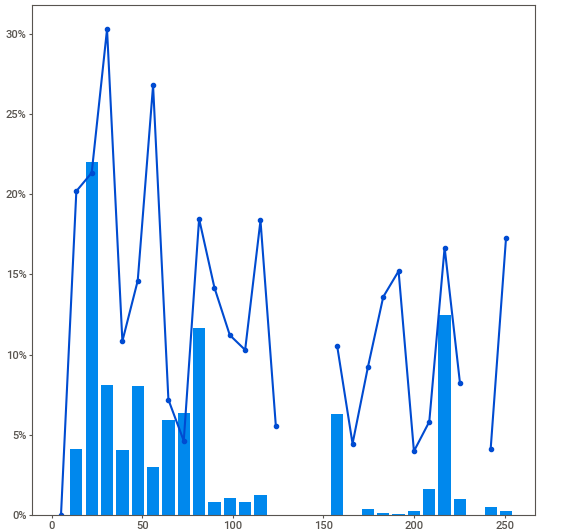
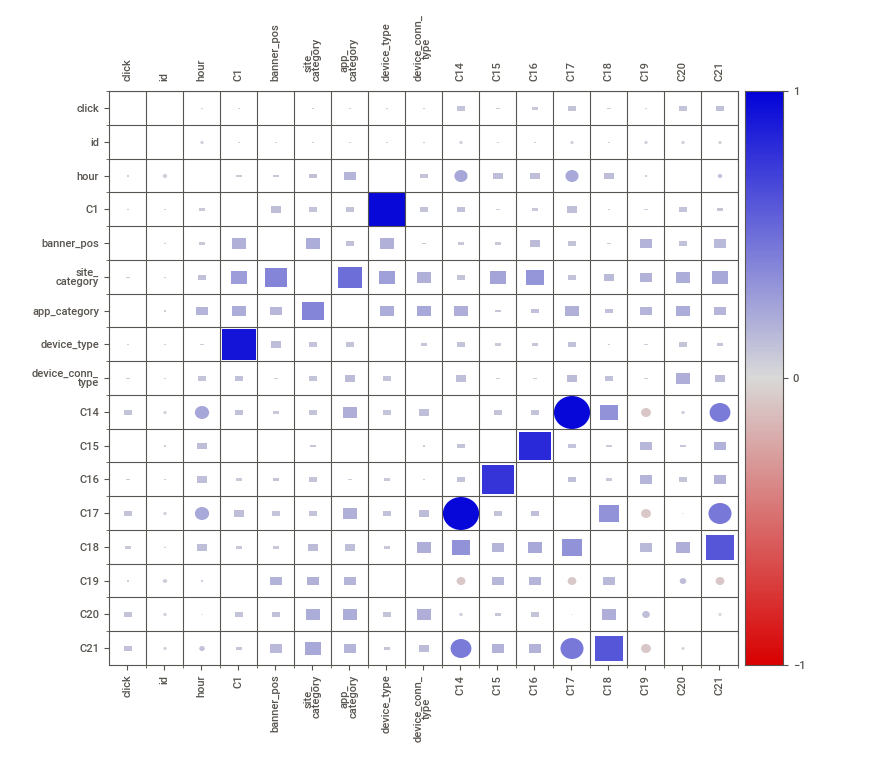
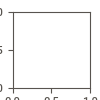

In [15]:
analyze_report.show_notebook()

**Exercise**: For categorical features with a lot of categories it's useful to view a table that shows the top categories in terms of volume and their respective CTR. Write a function to do this. It'll be useful for exploratory data analysis.  

**Exercise**: For each feature in the training data 1) do some exploratory data analysis and 2) note how you want to process that feature for machine learning. Leverage Sweetviz's analysis and feel free to make additional plots to gain a better understanding of each feature. Note, there's an element of subjectivity here. Having said that, as a machine learning practitioner you should be able to put forth a strong argument for an action you're going to take on a feature.

Remember, categorical features require separate treatment from continuous features. To get an overview of processing modules, check out Scikit-Learn's documentation [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). In the next section, these feature transformations will be put in a [Scikit-Learn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Keep this in the back of your head as you think about how to process each feature. 

Beware of features that seem like they're continuous but are perhaps really categorical. [One Hot Encoding (OHE)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) is an extremely powerful and versataille apprpoach for processing categorical variables. Also, don't be afraid to drop features entirely if you don't think they'll be useful in machine learning. 

![](https://e6v4p8w2.rocketcdn.me/wp-content/uploads/2022/01/One-Hot-Encoding-for-Scikit-Learn-in-Python-Explained.png)[Image Source](https://datagy.io/sklearn-one-hot-encode/)

In [19]:
def ctr_by_cat(df, name):
  """Returns CTR by category value for a categorical feature.
  
  Inputs:
    df (pd dataframe): Dataframe containing relevant data
    name (str): Name of categorical variable

  Returns:
    tmp_df (pd dataframe): Contains the CTR by category *name* and a normalized 
      value count. Dataframe is sorted in descending order by normalized value 
      count.   
  """
  tmp_df = pd.merge(
      pd.Series(df.groupby(name)['click'].mean(),  name='CTR'),
      pd.Series(df[name].value_counts(normalize=True), name='ValueCounts'), 
      left_index=True, right_index=True
      )
  tmp_df = tmp_df.sort_values('ValueCounts', ascending=False)
  return tmp_df

Feel free to define any data structures you'll need going forward below.

In [20]:
# The following dictionary is keyed by feature name for which one hot encoding will be applied. 
# Values are category values to binarize. 
cols_ohe = {}

# List to store columns to drop
cols_to_drop = []

We'll do the first two features to give you a better idea of what's required. 

### id

Unique identifier for each row. Useless for ML. Drop this field.

In [21]:
cols_to_drop.append('id')

### hour

This is a date string in the format YYMMDDHH. Let's extract the hour from it and make that be the sole feature. For ML ppurposes, let's ultimately apply one hot encoding to it.

In [22]:
X_train['hour'] = X_train['hour'].apply(lambda x: str(x)[-2:])

Does the CTR vary much by hour of the day?

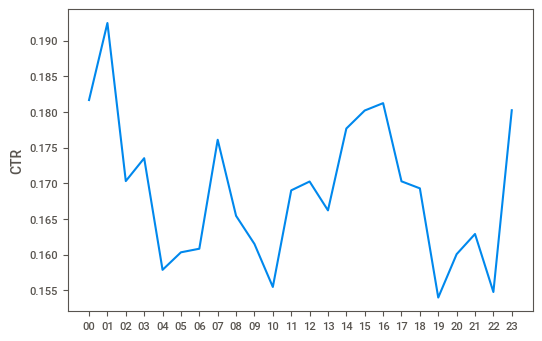

In [23]:
tmp = ctr_by_cat(X_train, 'hour')
tmp.sort_index(inplace=True)
sns.lineplot(x=tmp.index, y=tmp.CTR);

We want to apply one hot encoding to this feature ultimately so let's add the feature name to the dictionary `cols_ohe` we created earlier. From the [OHE documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), we should also supply the categories.

In [24]:
cols_ohe['hour'] = list(tmp.index)

### C1

Notice strong correlaiton to `device_type`. One of these columns should be dropped to avoid collinearity. Apply one hot encoder but only track buckets for 1005, 1002, and 1010 since these capture 99% of cases. 

In [26]:
cols_ohe['C1'] = [1002, 1005, 1010]

### banner_pos

Apply one hot encdoing while only keeping categories 0 and 1 as these capture over 99% of all cases.

In [27]:
cols_ohe['banner_pos'] = [0, 1]

### site_id

Apply one hot encoder. Only keep categories 85f751fd, 1fbe01fe, e151e245, d9750ee7, 5b08c53b.

In [28]:
tmp = ctr_by_cat(X_train, 'site_id')
tmp.head()

,CTR,ValueCounts
85f751fd,0.116829,0.360428
1fbe01fe,0.201680,0.160891
e151e245,0.298581,0.065674
d9750ee7,0.278352,0.024243
5b08c53b,0.455655,0.022563


In [29]:
cols_ohe['site_id'] = ['85f751fd', '1fbe01fe', 'e151e245', 'd9750ee7', '5b08c53b']

### site_domain

Apply one hot encoder. Only keep categories c4e18dd6, f3845767, 7e091613, 7687a86e, 98572c79. 	

In [30]:
tmp = ctr_by_cat(X_train, 'site_domain')
tmp.head()

,CTR,ValueCounts
c4e18dd6,0.120967,0.373712
f3845767,0.201680,0.160891
7e091613,0.261945,0.082875
7687a86e,0.450569,0.031630
98572c79,0.272727,0.025002


In [31]:
cols_ohe['site_domain'] = ['c4e18dd6', 'f3845767', '7e091613', '7687a86e', '98572c79']

### site_category

Apply one hot encoder. Only keep top 4 categories in 50e219e0, f028772b, 28905ebd, 3e814130.

In [32]:
tmp = ctr_by_cat(X_train, 'site_category')
tmp.head()

,CTR,ValueCounts
50e219e0,0.126659,0.408275
f028772b,0.181132,0.313686
28905ebd,0.205377,0.182723
3e814130,0.273644,0.075270
f66779e6,0.038484,0.006145


In [33]:
cols_ohe['site_category'] = ['50e219e0', 'f028772b', '28905ebd', '3e814130']

### app_id

Apply one hot encoder. Only keep top category in ecad2386.

In [34]:
# CTR of app_id ecad2386
print(X_train.loc[X_train['app_id'] == 'ecad2386']['click'].mean())
# CTR of app_id NOT ecad2386
print(X_train.loc[X_train['app_id'] != 'ecad2386']['click'].mean())

tmp = ctr_by_cat(X_train, 'app_id')
tmp.head()

0.19743180827405818
0.11682856135678195


,CTR,ValueCounts
ecad2386,0.197432,0.639572
92f5800b,0.018318,0.038727
e2fcccd2,0.188806,0.027871
febd1138,0.046789,0.018631
9c13b419,0.291834,0.018455


In [35]:
cols_ohe['app_id'] = ['ecad2386']

### app_domain

Apply one hot encoder. Only keep top two categories in 7801e8d9 and 2347f47a.

In [36]:
tmp = ctr_by_cat(X_train, 'app_domain')
tmp.head()

,CTR,ValueCounts
7801e8d9,0.193755,0.674350
2347f47a,0.135665,0.128774
ae637522,0.022787,0.046774
5c5a694b,0.188806,0.027871
82e27996,0.046780,0.018635


In [37]:
cols_ohe['app_domain'] = ['7801e8d9', '2347f47a']

### app_category

Apply one hot encoder. Keep top two categories in 07d7df22 and 0f2161f8.


In [38]:
tmp = ctr_by_cat(X_train, 'app_category')
tmp.head()

,CTR,ValueCounts
07d7df22,0.198173,0.647813
0f2161f8,0.106291,0.236482
cef3e649,0.087502,0.043036
8ded1f7a,0.093670,0.035794
f95efa07,0.238663,0.028097


In [39]:
cols_ohe['app_category'] = ['07d7df22', '0f2161f8']

### device_id

Apply one hot encoding but only keep category a99f214a. CTR fot this category is .173, while outside this category it's .15. 

In [40]:
# CTR of device_id a99f214a
print(X_train.loc[X_train['device_id'] == 'a99f214a']['click'].mean())
# CTR of device_id NOT a99f214a
print(X_train.loc[X_train['device_id'] != 'a99f214a']['click'].mean())

tmp = ctr_by_cat(X_train, 'device_id')
tmp.head()

0.1725731829338168
0.14855987872662962


,CTR,ValueCounts
a99f214a,0.172573,0.825387
c357dbff,0.683544,0.000558
0f7c61dc,0.764286,0.000494
936e92fb,0.058824,0.000360
afeffc18,0.180328,0.000215


In [41]:
cols_ohe['device_id'] = ['a99f214a']

### device_ip

Let's drop this column as it contains too many unique categorical values. 

In [42]:
cols_to_drop.append('device_ip')

### device_model

Let's also drop this one since there are too many categorical options. The largest category holds only 6% of all values.

In [43]:
tmp = ctr_by_cat(X_train, 'device_model')
tmp.head()

,CTR,ValueCounts
8a4875bd,0.132520,0.061015
d787e91b,0.225971,0.035251
1f0bc64f,0.217978,0.034552
76dc4769,0.179843,0.018839
be6db1d7,0.194120,0.018127


In [44]:
cols_to_drop.append('device_model')

### device_type

High correlation with feature `C1`. Drop to avoid collinearity issues. 

In [45]:
cols_to_drop.append('device_type')

### device_conn_type

Apply one hot encoding.


In [46]:
tmp = ctr_by_cat(X_train, 'device_conn_type')
tmp.head()

,CTR,ValueCounts
device_conn_type,,
0,0.179569,0.862551
2,0.137636,0.082466
3,0.038846,0.053967
5,0.045139,0.001016


In [47]:
cols_ohe['device_conn_type'] = [0, 2, 3, 5]

### C14

This feature is marked as being continuous by Sweetviz but there are only some 2000 unique values. Overall, this feature has low correlation with the target.  Scatter plot below should take on somewhat of a sigmoidal shape if this feature had predictive power. Drop this feature. 

In [48]:
tmp = ctr_by_cat(X_train, 'C14')
tmp.head()

,CTR,ValueCounts
4687,0.246629,0.023555
21611,0.056589,0.022577
21191,0.021439,0.019425
21189,0.016300,0.018621
19771,0.113588,0.018208


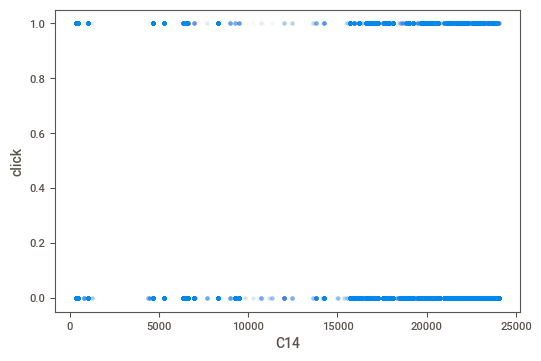

In [49]:
sns.scatterplot(data=X_train, x='C14', y='click', alpha=.01);

In [50]:
cols_to_drop.append('C14')

### C15

Apply one hot encoder but only keep categories 320, and 300.

In [51]:
tmp = ctr_by_cat(X_train, 'C15')
tmp.head()

,CTR,ValueCounts
320,0.157437,0.932604
300,0.353688,0.057796
216,0.128170,0.007655
728,0.053279,0.001722
1024,0.291667,0.000085


In [52]:
cols_ohe['C15'] = [300, 320]

### C16

Highly correlated to `C15`. Drop this column. 

In [53]:
cols_to_drop.append('C16')

### C17

This feature is highly correlated to `C14`, which we dropped. Drop this feature as well. 

In [54]:
cols_to_drop.append('C17')

### C18

Apply one hot encoder.

In [55]:
tmp = ctr_by_cat(X_train, 'C18')
tmp.head()

,CTR,ValueCounts
0,0.156011,0.420253
3,0.145930,0.336534
2,0.292411,0.175795
1,0.034133,0.067417


In [56]:
cols_ohe['C18'] = [0, 1, 2, 3]

### C19

Apply one hot encoder but only keep categories 35, 39, and 167. 

In [57]:
tmp = ctr_by_cat(X_train, 'C19')
tmp.head()

,CTR,ValueCounts
35,0.163783,0.301273
39,0.242470,0.218073
167,0.162918,0.077663
161,0.022599,0.039355
47,0.172700,0.036172


In [58]:
cols_ohe['C19'] = [35, 39, 167]

### C20

Apply one hot encoder but keep category -1 only. 

In [59]:
# CTR of C20 = -1
print(X_train.loc[X_train['C20'] == -1]['click'].mean())
# CTR of C20 NOT -1
print(X_train.loc[X_train['C20'] != -1]['click'].mean())

tmp = ctr_by_cat(X_train, 'C20')
tmp.head()

0.1916801932731871
0.14792624895616557


,CTR,ValueCounts
-1,0.191680,0.467476
100084,0.212432,0.060242
100148,0.232604,0.044836
100111,0.085004,0.042599
100077,0.177585,0.039112


In [60]:
cols_ohe['C20'] = [-1]

### C21

Apply one hot encoder and only keep categories 23, 221, 79, 48, 71 and 61.

In [61]:
tmp = ctr_by_cat(X_train, 'C21')
tmp.head(10)

,CTR,ValueCounts
23,0.213451,0.219463
221,0.166752,0.124557
79,0.183457,0.114523
48,0.139200,0.053497
71,0.029017,0.052544
61,0.064771,0.051002
157,0.110504,0.047141
32,0.228036,0.043707
33,0.390902,0.037008
52,0.267713,0.030137


In [62]:
cols_ohe['C21'] = [23, 48, 61, 71, 79, 221]

## Make a Pipeline

In this section you'll be taking your learnings from the EDA section and applying them create a [Scikit-Learn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object. Make sure you fully understand pipelines before proceeding. Ultimately, a pipeline object can be packaged, saved, and deployed in a production ML system. 

![](https://i.ytimg.com/vi/jzKSAeJpC6s/maxresdefault.jpg) [Image Source](https://www.youtube.com/watch?v=jzKSAeJpC6s)

Import relevant Scikit-Learn Pipeline libraries. 

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

**Exercise**: While Scikit-Learn offers a number of extremely useful transformations that can be included in a Pipeline, there will likely be a time where you want to write a custom transformer. This is pretty straightforward and an excellent example is provided [here](https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156). Write a custom transformer to drop columns entirely. 

In [64]:
class ColumnDropTransformer():
  """Given a list of columns, drops these columns from input dataframe. 
  """
  def __init__(self, columns):
    self.columns=columns

  def transform(self, X, y=None):
    return X.drop(self.columns, axis=1)

  def fit(self, X, y=None):
    return self 

**Exercise**: Place all your feature transformations in a Pipeline. Note, you'll likely need to make use of [Scikit-Learn's ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html). 

In [65]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe',
         OneHotEncoder(
             categories=list(cols_ohe.values()),
             handle_unknown='ignore',
             sparse=False
         ),
         list(cols_ohe.keys())
         )
    ],
    remainder = 'passthrough'
)

pipe = Pipeline(
    steps=[
        ('dropCols', ColumnDropTransformer(cols_to_drop)),
        ('preprocessor', preprocessor)
    ]
)

**Exercise**: Apply the `fit_transform` method to your pipeline and the training data. What's the size of the output data structure? Is this what you expected?

Note, use of one hot encoding can be very memory intensive. Often times, for categorical features with high cardinality, hashing can be used as an alternative. See the article [here](https://medium.com/flutter-community/dealing-with-categorical-features-with-high-cardinality-feature-hashing-7c406ff867cb).

In [66]:
tmp = pipe.fit_transform(X_train)
tmp.shape

(283341, 70)

**Exercise**: A Scikit-Learn Pipeline holds a lot of meta information that's important to umnderstand. Write a line of code to view the feature names output by the one hot encoder.  

In [67]:
pipe['preprocessor'].transformers_[0][1].get_feature_names_out()

array(['hour_00', 'hour_01', 'hour_02', 'hour_03', 'hour_04', 'hour_05',
       'hour_06', 'hour_07', 'hour_08', 'hour_09', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'C1_1002', 'C1_1005', 'C1_1010', 'banner_pos_0', 'banner_pos_1',
       'site_id_85f751fd', 'site_id_1fbe01fe', 'site_id_e151e245',
       'site_id_d9750ee7', 'site_id_5b08c53b', 'site_domain_c4e18dd6',
       'site_domain_f3845767', 'site_domain_7e091613',
       'site_domain_7687a86e', 'site_domain_98572c79',
       'site_category_50e219e0', 'site_category_f028772b',
       'site_category_28905ebd', 'site_category_3e814130',
       'app_id_ecad2386', 'app_domain_7801e8d9', 'app_domain_2347f47a',
       'app_category_07d7df22', 'app_category_0f2161f8',
       'device_id_a99f214a', 'device_conn_type_0', 'device_conn_type_2',
       'device_conn_type_3', 'device_conn_type_5', 'C15_300', 'C15_3

**Exercise**: Once your pipeline is trained, you can save it and use it for all sorts of APIs in a production environment. In the Scikit-Learn ecosystem you can use `pickle` and `joblib` to save model pipelines. Save your pipeline using `joblib`. You can read more about model persistence [here](https://scikit-learn.org/stable/model_persistence.html).

In [69]:
from joblib import dump

In [70]:
dump(pipe, '/content/pipeline.joblib')

['/content/pipeline.joblib']